# Intern : Mohamed Khaled Elshraby

# E-mail:mohamedalshraby3@gmail.com

#  GRIP: The Sparks Foundation
# Data Science and Business Analytics Internship


# Task 1: Prediction-using-Supervised-ML

### Importing all libraries required in this notebook


In [29]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sb
%matplotlib inline

###  Reading data from remote link


In [6]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


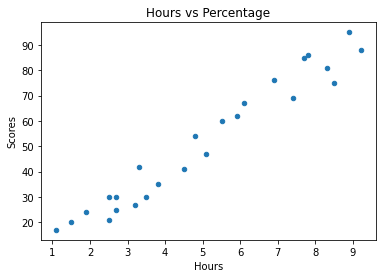

In [11]:
data.plot(kind='scatter', x='Hours', y='Scores')
plt.title('Hours vs Percentage')  
plt.show()

In [13]:
#correlation is usefull for getting the relationship between attributes.
#by default it will give the correlation by pearson method
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [31]:
hours = data['Hours']
scores = data['Scores']

C:\Users\Mohamed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


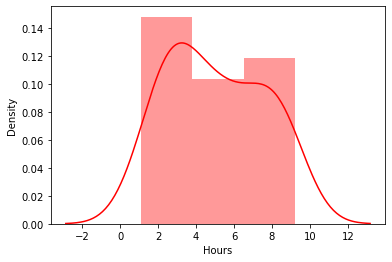

In [30]:
sb.distplot(data['Hours'],color='red');


C:\Users\Mohamed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


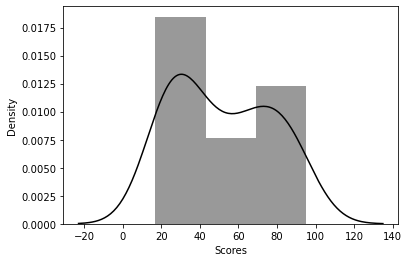

In [32]:
sb.distplot(data['Scores'],color='black');


# Linear Regression:


In [34]:
#Splitting the dataset into independent and dependent variaable
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [36]:
#Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [39]:
#Training the linear regression model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [40]:
algo=LinearRegression()
algo.fit(X_train,y_train)


LinearRegression()

In [41]:
#predicting the results
y_pred=regressor.predict(X_test)

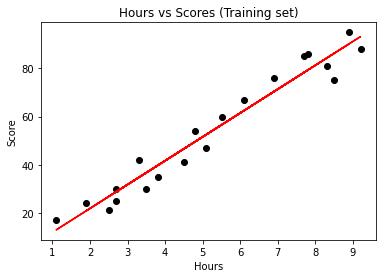

In [44]:
#Visualising the training set result
plt.scatter(X_train, y_train, color = 'black')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Hours vs Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [48]:
pred=algo.predict(X_test)
pd.DataFrame({'True_Value':y_test,'PREDICTED_Value':pred})

,True_Value,PREDICTED_Value
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


C:\Users\Mohamed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


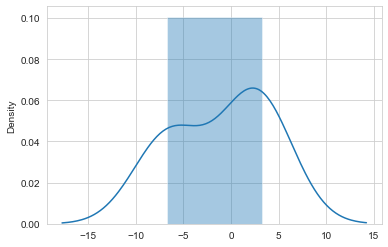

In [49]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

In [51]:
h=9.25
a=algo.predict([[h]])
print('if student studies for {} hours per day he/she is likely to score {}%'.format(h,*a))

if student studies for 9.25 hours per day he/she is likely to score 93.69173248737538%


In [53]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [54]:
#Checking the accuracy of model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9454906892105356